In [4]:
import pandas as pd
import numpy as np

# Загрузка данных из CSV файла
df = pd.read_csv('task-1-stocks.csv')

# Вычисляем доходности и риски
returns = df.pct_change(axis='rows').dropna()  # Доходность для каждого дня
average_returns = returns.mean(axis=0)  # Средняя доходность для каждой акции
risk = returns.std(axis='rows')  # Риск каждой акции

# Удаление акций с отрицательной доходностью
positive_returns_mask = average_returns > 0
average_returns = average_returns[positive_returns_mask]
risk = risk[positive_returns_mask]
df = df.loc[:, positive_returns_mask]

# Стоимость акций на первый день
prices = df.iloc[0, :].values

# Задаем ограничения
target_risk = 0.2
max_investment = 1000000  # Бюджет

# Сортируем акции по отношению доходность/риск
ratios = average_returns / risk
sorted_indices = np.argsort(ratios)[::-1]  # Отсортированные индексы

print(len(sorted_indices))
# Вывод результатов
print("Ранжированный список акций (доходность/риск):")
for i in sorted_indices:
    print(f"Акция {i}: Доходность={average_returns[i]:.4f}, Риск={risk[i]:.4f}, Цена={prices[i]:.2f}, Отношение доходность/риск={ratios[i]:.4f}")


55
Ранжированный список акций (доходность/риск):
Акция 2: Доходность=0.0003, Риск=0.0004, Цена=48.66, Отношение доходность/риск=0.7787
Акция 32: Доходность=0.0035, Риск=0.0110, Цена=48.24, Отношение доходность/риск=0.3220
Акция 15: Доходность=0.0031, Риск=0.0125, Цена=75.55, Отношение доходность/риск=0.2487
Акция 48: Доходность=0.0026, Риск=0.0108, Цена=57.84, Отношение доходность/риск=0.2409
Акция 47: Доходность=0.0024, Риск=0.0107, Цена=70.43, Отношение доходность/риск=0.2260
Акция 37: Доходность=0.0024, Риск=0.0140, Цена=186.57, Отношение доходность/риск=0.1725
Акция 24: Доходность=0.0038, Риск=0.0223, Цена=153.53, Отношение доходность/риск=0.1689
Акция 29: Доходность=0.0015, Риск=0.0094, Цена=375.00, Отношение доходность/риск=0.1589
Акция 35: Доходность=0.0014, Риск=0.0089, Цена=197.36, Отношение доходность/риск=0.1549
Акция 49: Доходность=0.0020, Риск=0.0136, Цена=51.59, Отношение доходность/риск=0.1488
Акция 53: Доходность=0.0016, Риск=0.0110, Цена=225.10, Отношение доходность/ри

C:\Users\kurus\AppData\Local\Temp\ipykernel_42756\3506231943.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Акция {i}: Доходность={average_returns[i]:.4f}, Риск={risk[i]:.4f}, Цена={prices[i]:.2f}, Отношение доходность/риск={ratios[i]:.4f}")


In [5]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('task-1-stocks.csv')
returns = df.pct_change().dropna()
average_returns = returns.mean(axis=0)
risk = returns.std(axis=0)
prices = df.iloc[0, :].values

# Параметры
target_risk = 0.2
max_investment = 1000000
learning_rate = 0.01
iterations = 5000

# Инициализация количества акций
quantities = np.zeros(len(prices), dtype=int)

# Функция для оценки риска портфеля
def portfolio_risk(quantities):
    weights = quantities / quantities.sum()
    return np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights)))

# Градиентный спуск
for _ in range(iterations):
    
    portfolio_return = np.dot(average_returns, quantities)
    risk_level = portfolio_risk(quantities)
    
    # Целевая функция с градиентом
    objective = portfolio_return - 0.1 * max(0, risk_level - target_risk)
    gradient = average_returns - 0.1 * (risk > target_risk)
    
    # Обновляем количество акций, чтобы минимизировать риск
    quantities += (learning_rate * gradient * max_investment / prices).astype(int)
    quantities = np.clip(quantities, 0, None)
    
    if np.dot(quantities, prices) > max_investment:
        quantities -= (learning_rate * gradient * max_investment / prices).astype(int)
        
        break
    
    #if risk_level <= target_risk and np.dot(quantities, prices) <= max_investment:
        #break

# Вывод результатов
investment = np.dot(quantities, prices)
print("Ранжированный список акций:")
for i, qty in enumerate(quantities):
    if qty > 0:
        print(f"Акция {i}: количество = {qty}, цена = {prices[i]}")

print("\nОбщая сумма портфеля:", investment)
print("Остаток:", max_investment - investment)
print("Ожидаемая доходность:", np.dot(average_returns, quantities))
print("Риск портфеля:", portfolio_risk(quantities))
print("Акции: ", quantities)


C:\Users\kurus\AppData\Local\Temp\ipykernel_42756\1176370913.py:22: RuntimeWarning: invalid value encountered in divide
  weights = quantities / quantities.sum()


Ранжированный список акций:
Акция 0: количество = 10719, цена = 10.829590797424316
Акция 2: количество = 42, цена = 2.190000057220459
Акция 3: количество = 147575619, цена = 0.0006999999750405
Акция 4: количество = 25, цена = 2.8399999141693115
Акция 9: количество = 2016363, цена = 0.0768299996852874
Акция 12: количество = 102957, цена = 0.0010999999940395
Акция 13: количество = 32846589, цена = 0.0076999999582767
Акция 14: количество = 1885353, цена = 0.1199999973177909
Акция 15: количество = 6626724, цена = 0.0219999998807907
Акция 18: количество = 1, цена = 20.84000015258789

Общая сумма портфеля: 999548.570812053
Остаток: 451.4291879469529
Ожидаемая доходность: 2119696.145447716
Риск портфеля: 0.13021574328168822
Акции:  S0         10719
S1             0
S2            42
S3     147575619
S4            25
         ...    
S95            0
S96            0
S97            0
S98            0
S99            0
Length: 100, dtype: int32


In [37]:
import numpy as np
import random

# Установим параметры
num_buses = 15                  # Число автобусов
bus_capacity = 10               # Вместимость каждого автобуса
max_time_steps = 15             # Максимальное число тактов на маршрут
alpha = 1.0                     # Влияние феромонов
beta = 2.0                      # Влияние расстояний
evaporation_rate = 0.5          # Испарение феромонов
pheromone_boost = 1.0           # Усиление феромонов при возвращении к вокзалу


# Инициализация феромонной и матрицы расстояний
distance_matrix = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(0, 58))
# distance_matrix_replaced = np.where(distance_matrix == '-', 1e3, distance_matrix).astype(np.float64)
num_locations = distance_matrix.shape[0]
pheromone_matrix = np.ones((num_locations, num_locations))
# distance_matrix = list(distance_matrix)
distance_matrix_replaced = np.where(distance_matrix[:, 1:] == "-", np.inf, distance_matrix[:, 1:]).astype(float)

# Список позиций, включая вокзал
# print(distance_matrix)
locations = list(distance_matrix[:, 0])
# print(locations)
start_point = locations.index("Вокзал")  # Индекс вокзала

# Число билетов на каждую достопримечательность
tickets = {
    "Памятник Горькому": 2, "Борский музей военной техники": 2, # и другие
    'Канавинский мост 1': 0,
'Канавинский мост 2':0,
'Вокзал': 0,
'Метромост 1':0,
'Метромост 2': 0,
'Молитовский мост 1': 0,
'Молитовский мост 2': 0,
'Мызинский мост 2': 0,
'Борский мост 1': 0,
'Борский мост 2':0,
'Паромная переправа 1':0,
'Паромная переправа 2':0,
'Борский краеведческий музей': 2,
'Неклюдово': 0,
'Музей Сахарова':5,
'Зоопарк':5,
'Копосовская дубрава':2,
'Стрелка':9,
'Собор Александра Невского':3,
'Нижегородская ярмарка':5,
'Мещерское озеро':2,
'Парк 1 мая':3,
'Нижегородский планетарий':3,
'Спасский Староярмарочный собор':2,
'Кремль':9,
'Памятник Минину и Пожарскому':5,
'Чкаловская лестница':9,
'Рождественская церковь':3,
'Домик Петра 1':3,
'Набережная Федоровского':2,
'Усадьба Рукавишниковых':3,
'Церковь Рождества Иоанна Предтечи на Торгу':2,
'Благовещенский монастырь':5,
'Нижне-Волжская набережная':2,
'Большая Покровская улица':5,
'Большая Покровская улица 2':3,
'Площадь Минина и Пожарского':5,
'Обзорная площадка на Гремячей горе':3,
'Музей истории художественных промыслов':5,
'Никольский собор':2,
'Музей «Паровозы России»':2,
'Русский музей фотографии':2,
'Литературный музей им. Горького':2,
'Музей народов Нижегородского поволжья':5,
'Щёлоковский хутор':9,
'Святой источник Пафнутия Балахнинского':3,
'Перекресток 1':0,
'Перекресток 2':0,
'Перекресток 3':0,
'Перекресток 4':0,
'Мызинский мост 1':0,
'Перекресток 5':0,
'Перекресток 6':0,
'Перекресток 7':0,
'Перекресток 8':0
}

# Группы в автобусах
groups = [2, 3, 5, 9]  # Возможные размеры групп

def get_feasible_points(bus_groups, visited):
    """Возвращает список допустимых точек для автобуса"""
    feasible_points = []
    for point, ticket_count in tickets.items():
        if ticket_count in bus_groups and point not in visited:
            feasible_points.append(locations.index(point))
    return feasible_points

def choose_next_point(current, feasible_points, pheromone_matrix, distance_matrix, alpha, beta):
    """Выбирает следующую точку на основе феромонов и расстояний"""
    pheromones = pheromone_matrix[current, feasible_points]
    distances = distance_matrix[current, feasible_points]
    
    # Избегаем деления на 0, устанавливая минимальное расстояние
    distances = np.where(distances == 0, np.inf, distances)
    
    # Вычисляем вероятности с защитой от NaN
    probabilities = (pheromones ** alpha) * ((1.0 / distances) ** beta)
    
    # Нормализуем вероятности, проверяя на NaN
    if np.sum(probabilities) == 0 or np.isnan(probabilities).any():
        # Если все вероятности стали NaN или 0, выбираем случайную точку
        return np.random.choice(feasible_points)
    
    probabilities /= probabilities.sum()
    
    return np.random.choice(feasible_points, p=probabilities)

def run_ant_colony_optimization():
    """Запускает основную логику алгоритма муравьиной колонии"""
    global pheromone_matrix
    best_route = None
    best_cost = float("inf")

    for iteration in range(100):  # Количество итераций
        all_routes = []
        all_costs = []
        
        # Для каждого автобуса прокладываем маршрут
        for bus in range(num_buses):
            route = [start_point]  # Начало маршрута в вокзале
            bus_groups = random.sample(groups, random.randint(1, 3))  # Случайный выбор групп для автобуса
            visited = set()
            total_cost = 0
            
            # Прокладываем маршрут для автобуса
            for step in range(max_time_steps):
                feasible_points = get_feasible_points(bus_groups, visited)
                if not feasible_points:
                    break  # Если нет доступных точек, выходим
                
                next_point = choose_next_point(route[-1], feasible_points, pheromone_matrix, distance_matrix_replaced, alpha, beta)
                route.append(next_point)
                visited.add(next_point)
                total_cost += distance_matrix_replaced[route[-2], next_point]
                
                # Проверка возвращения к вокзалу
                if step == max_time_steps - 1:
                    route.append(start_point)
                    total_cost += distance_matrix_replaced[next_point, start_point]

            all_routes.append(route)
            all_costs.append(total_cost)

            # Обновление лучшего маршрута
            if total_cost < best_cost:
                best_cost = total_cost
                best_route = route

        # Обновляем феромоны
        pheromone_matrix *= (1 - evaporation_rate)
        for route, cost in zip(all_routes, all_costs):
            for i in range(len(route) - 1):
                pheromone_matrix[route[i], route[i + 1]] += pheromone_boost / cost

    return best_route, best_cost

# Запуск алгоритма



In [38]:
best_route, best_cost = run_ant_colony_optimization()
print("Лучший маршрут:", best_route)
print("Общая стоимость:", best_cost)

Лучший маршрут: [2, 21, 20, 19, 20, 19, 20, 21, 20, 19, 20, 19, 20, 19, 20, 21, 2]
Общая стоимость: 38.0


TypeError: object of type 'int' has no len()

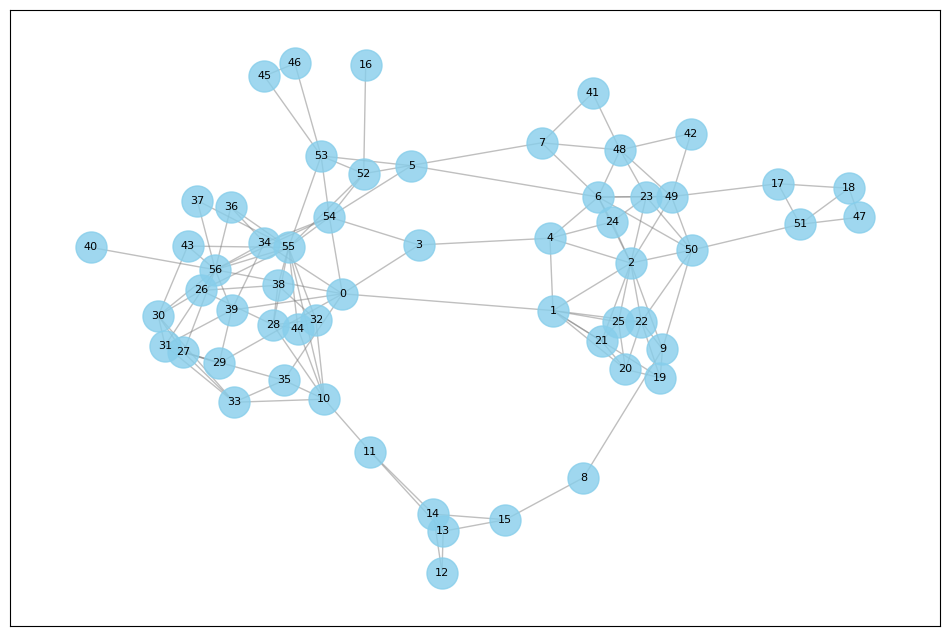

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_routes(distance_matrix, routes):
    """
    Визуализирует маршруты автобусов на графе.

    Параметры:
    - distance_matrix: матрица расстояний (2D numpy массив)
    - routes: список маршрутов для каждого автобуса, где каждый маршрут — это список индексов точек
    """
    # Создаем граф на основе матрицы расстояний
    G = nx.Graph()
    num_locations = len(distance_matrix)
    
    # Добавляем узлы и связи между точками
    for i in range(num_locations):
        for j in range(i + 1, num_locations):
            if distance_matrix[i, j] != np.inf:  # Добавляем ребро только при конечном расстоянии
                G.add_edge(i, j, weight=distance_matrix[i, j])

    # Получаем координаты узлов для визуализации
    pos = nx.spring_layout(G, seed=42)  # Используем фиксированный макет для консистентности
    
    # Рисуем граф с узлами и ребрами
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="gray")
    
    # Цветовая схема для разных маршрутов автобусов
    colors = plt.cm.get_cmap("tab20", len(routes))
    
    # Рисуем маршруты для каждого автобуса
    for idx, route in enumerate(routes):
        edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.8, edge_color=[colors(idx)])
        nx.draw_networkx_nodes(G, pos, nodelist=route, node_size=600, node_color=[colors(idx)], alpha=0.9)

    plt.title("Маршруты автобусов")
    plt.show()

# Пример вызова функции визуализации маршрутов
# routes = [[0, 1, 5, 2, 0], [0, 3, 6, 4, 0], ...]  # Замените на фактические маршруты, полученные алгоритмом
# plot_routes(distance_matrix, routes)
plot_routes(distance_matrix_replaced, best_route)

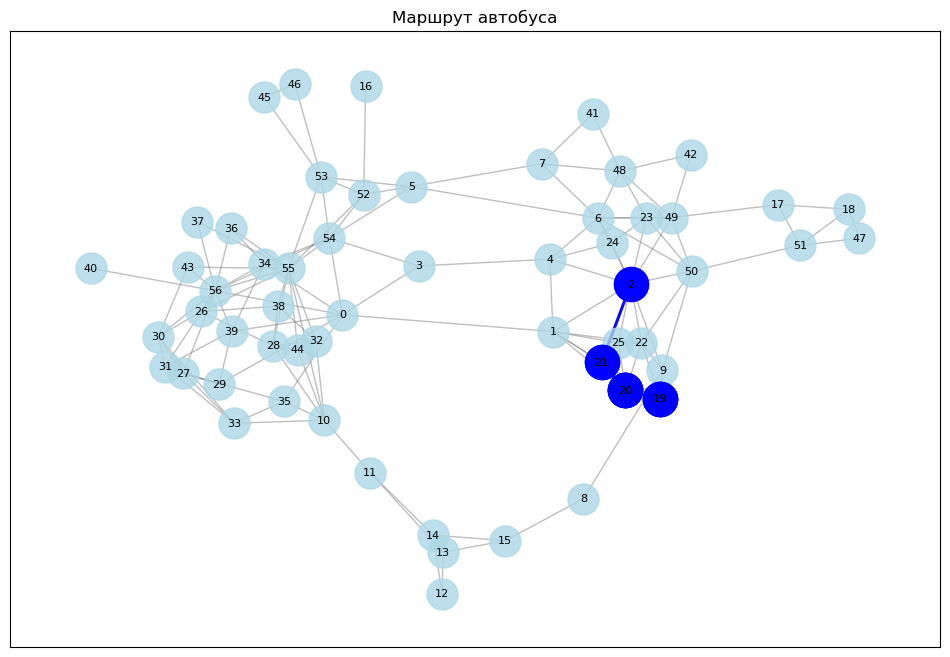

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_single_route(distance_matrix, route):
    """
    Визуализирует маршрут для одного автобуса на графе.

    Параметры:
    - distance_matrix: матрица расстояний (2D numpy массив)
    - route: список индексов точек маршрута
    """
    # Создаем граф на основе матрицы расстояний
    G = nx.Graph()
    num_locations = len(distance_matrix)
    
    # Добавляем узлы и связи между точками
    for i in range(num_locations):
        for j in range(i + 1, num_locations):
            if distance_matrix[i, j] != np.inf:  # Добавляем ребро только при конечном расстоянии
                G.add_edge(i, j, weight=distance_matrix[i, j])

    # Получаем координаты узлов для визуализации
    pos = nx.spring_layout(G, seed=42)  # Используем фиксированный макет для консистентности
    
    # Рисуем граф с узлами и ребрами
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue", alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="gray")
    
    # Рисуем маршрут для автобуса
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, width=2, alpha=0.8, edge_color="blue")
    nx.draw_networkx_nodes(G, pos, nodelist=route, node_size=600, node_color="blue", alpha=0.9)

    plt.title("Маршрут автобуса")
    plt.show()

# Пример вызова функции визуализации маршрута
route = [2, 21, 20, 19, 20, 19, 20, 21, 20, 19, 20, 19, 20, 19, 20, 21, 2]
plot_single_route(distance_matrix_replaced, route)


In [73]:
import numpy as np
import random

# Константы
num_buses = 15
num_places = 57
max_time = 15
max_capacity = 10
ticket_sizes = [2, 3, 5, 9]  # Размеры групп
# ticket_distribution = np.random.choice(ticket_sizes, num_places)  # Примерное распределение билетов
ticket_distribution = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
print(ticket_distribution.shape)

# Матрица расстояний (для простоты примера, случайные данные)
# distances = np.random.randint(1, 10, size=(num_places, num_places))
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)
# np.fill_diagonal(distances, 0)

# Инициализация феромонов
pheromones = np.ones((num_places, num_places))  # Изначально феромоны равны 1
pheromone_evaporation = 0.95  # Испарение феромонов
pheromone_deposit = 100  # Количество феромонов, оставляемое муравьями

import numpy as np

import numpy as np

# Алгоритм муравьиной колонии (ACO)
def aco_algorithm():
    best_solution = [None] * num_buses  # Для хранения лучших маршрутов для каждого автобуса
    best_cost = [float('inf')] * num_buses  # Для хранения стоимости лучших маршрутов
    all_visited = set()  # Храним все посещенные достопримечательности для всех автобусов

    for iteration in range(100):  # Число итераций
        solutions = []
        print(f"Итерация {iteration + 1}:")
        for bus in range(num_buses):
            route, cost = generate_route(bus, all_visited)  # Передаем общий список посещённых достопримечательностей
            solutions.append((route, cost))

            # Выводим промежуточные данные
            print(f"Маршрут для автобуса {bus}: {route}")
            print(f"Стоимость маршрута для автобуса {bus}: {cost}")

            # Сохраняем лучший маршрут для каждого автобуса
            if cost < best_cost[bus]:
                best_cost[bus] = cost
                best_solution[bus] = route

            # Добавляем посещенные места в общий список
            all_visited.update(route)

        # Обновляем феромоны
        update_pheromones(solutions)

    return best_solution, best_cost


# Генерация маршрута для каждого автобуса с учётом посещённых достопримечательностей
def generate_route(bus, all_visited):
    route = [0]  # Начинаем с вокзала
    visited = [False] * num_places
    visited[0] = True  # Вокзал посещен

    current_time = 0
    while len(route) < num_places and current_time < max_time:
        next_stop = select_next_stop(route[-1], visited, all_visited)
        if next_stop is None:
            print(f"Нет доступных остановок для автобуса {bus}. Завершаем маршрут.")
            break
        route.append(next_stop)
        visited[next_stop] = True
        current_time += distances[route[-2], route[-1]]

    route.append(0)  # Возвращаемся на вокзал
    total_cost = calculate_cost(route)

    return route, total_cost


# Выбор следующей остановки с учётом всех посещённых достопримечательностей
def select_next_stop(current_stop, visited, all_visited):
    probabilities = []
    total_pheromone = 0
    for i in range(num_places):
        if not visited[i] and i not in all_visited:  # Выбираем только незасещённые и не посещённые другими автобусами места
            pheromone_level = pheromones[current_stop][i]
            distance = distances[current_stop][i]
            if distance == 0:  # Если расстояние равно 0, пропускаем
                continue
            prob = pheromone_level / (distance + 1)
            probabilities.append(prob)
            total_pheromone += prob
    
    if total_pheromone == 0:  # Если не было допустимых путей
        return None

    # Нормализуем вероятности
    probabilities = [p / total_pheromone for p in probabilities]
    next_stop = np.random.choice([i for i in range(num_places) if not visited[i] and i not in all_visited], p=probabilities)
    
    return next_stop


# Обновление феромонов с проверкой на ноль
def update_pheromones(solutions):
    for route, cost in solutions:
        if cost == 0:  # Если стоимость маршрута равна 0, пропускаем обновление
            continue

        pheromone_deposit = 1 / cost  # Сумма феромонов на основании стоимости маршрута
        for i in range(len(route) - 1):
            # Обновляем феромоны между остановками
            if distances[route[i], route[i + 1]] > 0:  # Проверка на нулевое расстояние
                pheromones[route[i], route[i + 1]] += pheromone_deposit / distances[route[i], route[i + 1]]


# Пример расчета стоимости маршрута
def calculate_cost(route):
    cost = 0
    for i in range(len(route) - 1):
        cost += distances[route[i], route[i + 1]]
    return cost

# Инициализация параметров
num_buses = 15
num_places = 57
distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
pheromones = np.ones((num_places, num_places))  # Начальные феромоны
max_time = 15



# Основная часть
best_solution, best_cost = aco_algorithm()
print("Лучшее решение:", best_solution)
# print('fdfsf', len(all_routes))
print("Общая стоимость маршрута:", best_cost)


(57,)
Итерация 1:
Маршрут для автобуса 0: [0, 10, 56, 53, 18, 0]
Стоимость маршрута для автобуса 0: 22
Маршрут для автобуса 1: [0, 41, 2, 33, 4, 37, 0]
Стоимость маршрута для автобуса 1: 29
Маршрут для автобуса 2: [0, 46, 8, 30, 3, 0]
Стоимость маршрута для автобуса 2: 20
Маршрут для автобуса 3: [0, 22, 12, 54, 0]
Стоимость маршрута для автобуса 3: 20
Маршрут для автобуса 4: [0, 29, 49, 5, 26, 20, 28, 0]
Стоимость маршрута для автобуса 4: 19
Маршрут для автобуса 5: [0, 35, 24, 6, 36, 0]
Стоимость маршрута для автобуса 5: 24
Маршрут для автобуса 6: [0, 27, 9, 0]
Стоимость маршрута для автобуса 6: 22
Маршрут для автобуса 7: [0, 31, 16, 47, 55, 0]
Стоимость маршрута для автобуса 7: 21
Маршрут для автобуса 8: [0, 17, 48, 0]
Стоимость маршрута для автобуса 8: 23
Маршрут для автобуса 9: [0, 13, 25, 0]
Стоимость маршрута для автобуса 9: 19
Маршрут для автобуса 10: [0, 51, 43, 14, 40, 0]
Стоимость маршрута для автобуса 10: 26
Маршрут для автобуса 11: [0, 15, 52, 7, 0]
Стоимость маршрута для ав

In [117]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места

tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)
groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам

# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 0.005
cooling_rate = 0.005

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига
def simulated_annealing():
    current_solution = create_initial_solution()
    current_cost = calculate_cost(current_solution)
    best_solution = current_solution
    best_cost = current_cost
    temperature = initial_temp

    while temperature > final_temp:
        # Генерируем соседнее решение
        neighbor_solution = generate_neighbor(current_solution)
        neighbor_cost = calculate_cost(neighbor_solution)

        # Если новое решение лучше, принимаем его
        if neighbor_cost < current_cost:
            current_solution = neighbor_solution
            current_cost = neighbor_cost
        else:
            # Если новое решение хуже, принимаем его с некоторой вероятностью
            acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_cost = neighbor_cost

        # Если нашли лучшее решение, сохраняем его
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        # Понижаем температуру
        temperature *= cooling_rate

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)


Лучшее решение: [[45, 38], [29, 46, 22], [47, 30, 39, 23, 35, 19, 38, 32, 11], [23, 15, 38, 12, 34, 14, 45, 4, 25], [13, 42, 43, 56, 37, 55, 7, 27, 4], [36, 17], [38, 25, 12, 24, 1, 54, 4, 30, 39], [28, 1, 17, 2, 16, 5, 49, 10, 11], [2, 23, 46, 31, 1, 56, 50, 5, 25], [36, 30, 18, 20, 33], [30, 50, 5, 40, 25, 15, 52, 29, 56], [8, 36, 10], [52, 39, 48, 9, 45, 55, 14, 23, 2], [14, 35, 32, 37, 47], [48, 26, 38]]
Общая стоимость маршрута: 71063.0


In [84]:
len(best_solution)

15

In [119]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места
tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам

# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 1
cooling_rate = 0.995
iterations_per_temp = 10  # Увеличиваем количество шагов при каждой температуре
num_restarts = 10  # Количество запусков алгоритма

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига с многократными запусками
def simulated_annealing():
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(num_restarts):  # Количество запусков алгоритма
        current_solution = create_initial_solution()
        current_cost = calculate_cost(current_solution)
        temperature = initial_temp
        
        while temperature > final_temp:
            for _ in range(iterations_per_temp):  # Итерации при текущей температуре
                neighbor_solution = generate_neighbor(current_solution)
                neighbor_cost = calculate_cost(neighbor_solution)

                # Если новое решение лучше, принимаем его
                if neighbor_cost < current_cost:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost
                else:
                    # Если новое решение хуже, принимаем его с некоторой вероятностью
                    acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
                    if random.random() < acceptance_probability:
                        current_solution = neighbor_solution
                        current_cost = neighbor_cost

            # Понижаем температуру
            temperature *= cooling_rate

        # Сохраняем лучшее решение
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)


Лучшее решение: [[36, 10, 43, 19, 48], [25, 27, 39, 7, 41], [11, 4, 42, 56, 32, 6, 46, 13, 6], [55, 21, 33], [40, 2, 46, 24, 36], [24, 52, 45], [11, 30, 27, 11, 43, 52, 9, 31, 15], [53, 23, 36], [24, 13, 15, 7, 36, 54, 1, 35, 15], [43, 24, 4], [50, 25, 29], [21, 8, 16], [46, 12, 3, 12, 19, 19, 17, 28, 15], [30, 56], [51, 49]]
Общая стоимость маршрута: 40092.0


In [120]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места
tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам

# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 1
cooling_rate = 0.995
iterations_per_temp = 10  # Увеличиваем количество шагов при каждой температуре
num_restarts = 10  # Количество запусков алгоритма

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига с многократными запусками
def simulated_annealing():
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(num_restarts):  # Количество запусков алгоритма
        current_solution = create_initial_solution()
        current_cost = calculate_cost(current_solution)
        temperature = initial_temp
        
        while temperature > final_temp:
            for _ in range(iterations_per_temp):  # Итерации при текущей температуре
                neighbor_solution = generate_neighbor(current_solution)
                neighbor_cost = calculate_cost(neighbor_solution)

                # Если новое решение лучше, принимаем его
                if neighbor_cost < current_cost:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost
                else:
                    # Если новое решение хуже, принимаем его с некоторой вероятностью
                    acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
                    if random.random() < acceptance_probability:
                        current_solution = neighbor_solution
                        current_cost = neighbor_cost

            # Понижаем температуру
            temperature *= cooling_rate

        # Сохраняем лучшее решение
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)


Лучшее решение: [[32, 33, 56, 8, 10], [55, 4, 16, 36, 20, 15, 23, 53, 6], [45, 56], [13, 47, 43], [54, 2], [45, 17], [54, 21, 38, 13, 50], [52, 49, 22], [35, 37, 6, 4, 10], [7, 5, 2], [47, 16, 4], [17, 10, 44, 51, 21], [34, 49, 42, 23, 18, 11, 25, 34, 16], [44, 30, 3, 49, 25, 15, 25, 30, 13], [54, 21, 21]]
Общая стоимость маршрута: 35063.0


In [130]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места
tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

# groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам
# num_buses = 15
# import random
# print(np.count_nonzero(tickets == 2))
# Размеры групп
# group_sizes = [2, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 2, 5, 9, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 3, 2, 5, 9, 3, 5, 2, 9, 3, 5, 9, 3, 5, 9]
group_size = [2]*np.count_nonzero(tickets == 2) + [3]*np.count_nonzero(tickets == 3) + [5]*np.count_nonzero(tickets == 5) + [9]*np.count_nonzero(tickets == 9)
# Количество автобусов и мест
# print(len(group_size))
num_buses = 15
bus_capacity = 10

# Функция для распределения групп по автобусам
def distribute_groups(group_sizes, num_buses, bus_capacity):
    buses = [[] for _ in range(num_buses)]  # Список для автобусных маршрутов
    current_bus = 0  # Текущий автобус
    for group in group_sizes:
        # Пока группы не распределены, ищем автобус с достаточным количеством мест
        while True:
            if sum(buses[current_bus]) + group <= bus_capacity:
                buses[current_bus].append(group)
                break
            else:
                # Переходим к следующему автобусу
                current_bus += 1
                if current_bus >= num_buses:  # Если автобусы закончились
                    print("Не хватает места для всех групп!")
                    return buses
    return buses

# Получить распределённые группы
buses = distribute_groups(group_sizes, num_buses, bus_capacity)

# Показать результат
# for i, bus in enumerate(buses):
#     print(f"Автобус {i+1}: {bus} группа(ы), всего человек: {sum(bus)}")


# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 1
cooling_rate = 0.995
iterations_per_temp = 10  # Увеличиваем количество шагов при каждой температуре
num_restarts = 10  # Количество запусков алгоритма

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига с многократными запусками
def simulated_annealing():
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(num_restarts):  # Количество запусков алгоритма
        current_solution = create_initial_solution()
        current_cost = calculate_cost(current_solution)
        temperature = initial_temp
        
        while temperature > final_temp:
            for _ in range(iterations_per_temp):  # Итерации при текущей температуре
                neighbor_solution = generate_neighbor(current_solution)
                neighbor_cost = calculate_cost(neighbor_solution)

                # Если новое решение лучше, принимаем его
                if neighbor_cost < current_cost:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost
                else:
                    # Если новое решение хуже, принимаем его с некоторой вероятностью
                    acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
                    if random.random() < acceptance_probability:
                        current_solution = neighbor_solution
                        current_cost = neighbor_cost

            # Понижаем температуру
            temperature *= cooling_rate

        # Сохраняем лучшее решение
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)


Не хватает места для всех групп!
Лучшее решение: [[25, 46, 9, 6, 28], [32, 13], [9, 24, 8, 21, 44, 35, 5, 51, 10], [43, 42, 31, 51, 28, 47, 22, 38, 31], [50, 38, 27, 4, 33, 34, 19, 10, 20], [54, 13, 32, 47, 12], [47, 43, 29], [41, 38], [19, 49], [15, 34, 55, 2, 48], [5, 13], [5, 47, 37, 7, 15], [22, 6, 46, 31, 27], [3, 43], [51, 14]]
Общая стоимость маршрута: 36059.0


In [157]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места
tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

# groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам
# num_buses = 15
# import random
# print(np.count_nonzero(tickets == 2))
# Размеры групп
# group_sizes = [2, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 2, 5, 9, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 3, 2, 5, 9, 3, 5, 2, 9, 3, 5, 9, 3, 5, 9]
group_size = [2]*np.count_nonzero(tickets == 2) + [3]*np.count_nonzero(tickets == 3) + [5]*np.count_nonzero(tickets == 5) + [9]*np.count_nonzero(tickets == 9)
# Количество автобусов и мест
# print(group_size)
# print(np.count_nonzero(tickets))
num_buses = 15
bus_capacity = 10

# Заданное распределение групп
group_sizes = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9]

# Количество автобусов и мест
num_buses = 15
bus_capacity = 10

# Функция для распределения групп по автобусам
def distribute_groups(group_sizes, num_buses, bus_capacity):
    buses = [[] for _ in range(num_buses)]  # Список для автобусных маршрутов
    current_bus = 0  # Текущий автобус
    total_people = sum(group_sizes)  # Общее количество людей
    
    # Проверка, что все группы могут быть размещены
    if total_people > num_buses * bus_capacity:
        print(f"Ошибка: {total_people} человек не помещаются в {num_buses} автобусов!")
        return []
    
    # Перемешиваем группы для лучшего распределения
    random.shuffle(group_sizes)
    
    for group in group_sizes:
        # Ищем автобус с доступными местами для группы
        placed = False
        while not placed and current_bus < num_buses:
            if sum(buses[current_bus]) + group <= bus_capacity:
                buses[current_bus].append(group)
                placed = True
            else:
                current_bus += 1  # Переходим к следующему автобусу
        if not placed:  # Если группа не поместилась, начинаем с первого автобуса снова
            current_bus = 0
            buses[current_bus].append(group)
            
    return buses

# Получить распределённые группы
buses = distribute_groups(group_sizes, num_buses, bus_capacity)

# Показать результат
if buses:
    for i, bus in enumerate(buses):
        print(f"Автобус {i+1}: {bus} группа(ы), всего человек: {sum(bus)}")

# print(np.sum(group_size))


# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 1
cooling_rate = 0.995
iterations_per_temp = 10  # Увеличиваем количество шагов при каждой температуре
num_restarts = 10  # Количество запусков алгоритма

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига с многократными запусками
def simulated_annealing():
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(num_restarts):  # Количество запусков алгоритма
        current_solution = create_initial_solution()
        current_cost = calculate_cost(current_solution)
        temperature = initial_temp
        
        while temperature > final_temp:
            for _ in range(iterations_per_temp):  # Итерации при текущей температуре
                neighbor_solution = generate_neighbor(current_solution)
                neighbor_cost = calculate_cost(neighbor_solution)

                # Если новое решение лучше, принимаем его
                if neighbor_cost < current_cost:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost
                else:
                    # Если новое решение хуже, принимаем его с некоторой вероятностью
                    acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
                    if random.random() < acceptance_probability:
                        current_solution = neighbor_solution
                        current_cost = neighbor_cost

            # Понижаем температуру
            temperature *= cooling_rate

        # Сохраняем лучшее решение
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)
# np.sum(group_size)

Автобус 1: [5, 3] группа(ы), всего человек: 8
Автобус 2: [9] группа(ы), всего человек: 9
Автобус 3: [2, 3, 3] группа(ы), всего человек: 8
Автобус 4: [9] группа(ы), всего человек: 9
Автобус 5: [3, 2, 2, 3] группа(ы), всего человек: 10
Автобус 6: [3, 2, 2] группа(ы), всего человек: 7
Автобус 7: [5, 3, 2] группа(ы), всего человек: 10
Автобус 8: [9] группа(ы), всего человек: 9
Автобус 9: [2, 3, 5] группа(ы), всего человек: 10
Автобус 10: [3, 5] группа(ы), всего человек: 8
Автобус 11: [5, 2, 2] группа(ы), всего человек: 9
Автобус 12: [5, 2, 2] группа(ы), всего человек: 9
Автобус 13: [2, 2, 5] группа(ы), всего человек: 9
Автобус 14: [5, 5] группа(ы), всего человек: 10
Автобус 15: [9] группа(ы), всего человек: 9
Лучшее решение: [[17, 30, 15, 12, 47], [19, 24], [23, 11, 48, 3, 18, 52, 10, 54, 26], [44, 6, 4, 15, 15, 27, 3, 29, 3], [55, 41, 45, 21, 11, 44, 50, 5, 46], [14, 12, 35, 39, 5], [36, 19, 35], [5, 38], [22, 10], [13, 26, 21, 24, 56], [22, 43], [35, 47, 30, 41, 7], [10, 51, 48, 10, 28],

In [142]:
import numpy as np
import random
import math

# Инициализация данных
num_places = 57
num_buses = 15
max_capacity = 10
max_time = 15
# distances = np.random.randint(1, 10, size=(num_places, num_places))  # Матрица расстояний
# tickets = np.random.choice([2, 3, 5, 9], size=num_places)  # Билеты для каждого места
tickets = np.loadtxt(fname=r'task-2-nodes.csv', encoding='utf8', delimiter=',', usecols=1, dtype=np.int16)
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distances = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

# groups = np.random.choice([2, 3, 5, 9], size=num_buses)  # Список групп, присвоенных автобусам
# num_buses = 15
# import random
# print(np.count_nonzero(tickets == 2))
# Размеры групп
# group_sizes = [2, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 2, 5, 9, 3, 5, 9, 2, 3, 5, 9, 3, 5, 9, 3, 2, 5, 9, 3, 5, 2, 9, 3, 5, 9, 3, 5, 9]
group_size = [2]*np.count_nonzero(tickets == 2) + [3]*np.count_nonzero(tickets == 3) + [5]*np.count_nonzero(tickets == 5) + [9]*np.count_nonzero(tickets == 9)
# Количество автобусов и мест
# print(group_size)
# print(np.count_nonzero(tickets))
num_buses = 15
bus_capacity = 10

# Заданное распределение групп
group_sizes = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9]

# Количество автобусов и мест
num_buses = 15
bus_capacity = 10

# Функция для распределения групп по автобусам
def distribute_groups(group_sizes, num_buses, bus_capacity):
    buses = [[] for _ in range(num_buses)]  # Список для автобусных маршрутов
    current_bus = 0  # Текущий автобус
    total_people = sum(group_sizes)  # Общее количество людей
    
    # Проверка, что все группы могут быть размещены
    if total_people > num_buses * bus_capacity:
        print(f"Ошибка: {total_people} человек не помещаются в {num_buses} автобусов!")
        return []
    
    # Перемешиваем группы для лучшего распределения
    random.shuffle(group_sizes)
    
    for group in group_sizes:
        # Ищем автобус с доступными местами для группы
        placed = False
        while not placed and current_bus < num_buses:
            if sum(buses[current_bus]) + group <= bus_capacity:
                buses[current_bus].append(group)
                placed = True
            else:
                current_bus += 1  # Переходим к следующему автобусу
        if not placed:  # Если группа не поместилась, начинаем с первого автобуса снова
            current_bus = 0
            buses[current_bus].append(group)
            
    return buses

# Получить распределённые группы
buses = distribute_groups(group_sizes, num_buses, bus_capacity)

# Показать результат
if buses:
    for i, bus in enumerate(buses):
        print(f"Автобус {i+1}: {bus} группа(ы), всего человек: {sum(bus)}")

# print(np.sum(group_size))


# Инициализация температуры и охлаждения
initial_temp = 1000
final_temp = 1
cooling_rate = 0.995
iterations_per_temp = 10  # Увеличиваем количество шагов при каждой температуре
num_restarts = 10  # Количество запусков алгоритма

# Создание начального решения: случайное распределение групп по автобусам
def create_initial_solution():
    solution = []
    for bus in range(num_buses):
        route = random.sample(range(1, num_places), groups[bus])  # Случайный маршрут для каждого автобуса
        solution.append(route)
    return solution

# Оценка стоимости маршрута
def calculate_cost(solution):
    total_cost = 0
    for route in solution:
        route_cost = 0
        for i in range(len(route) - 1):
            route_cost += distances[route[i], route[i + 1]]
        total_cost += route_cost
    return total_cost

# Генерация соседнего решения
def generate_neighbor(solution):
    new_solution = solution.copy()
    bus_idx = random.randint(0, num_buses - 1)
    swap_idx = random.randint(0, len(new_solution[bus_idx]) - 1)
    new_place = random.randint(1, num_places - 1)
    new_solution[bus_idx][swap_idx] = new_place  # Заменяем случайную остановку
    return new_solution

# Алгоритм симулированного отжига с многократными запусками
def simulated_annealing():
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(num_restarts):  # Количество запусков алгоритма
        current_solution = create_initial_solution()
        current_cost = calculate_cost(current_solution)
        temperature = initial_temp
        
        while temperature > final_temp:
            for _ in range(iterations_per_temp):  # Итерации при текущей температуре
                neighbor_solution = generate_neighbor(current_solution)
                neighbor_cost = calculate_cost(neighbor_solution)

                # Если новое решение лучше, принимаем его
                if neighbor_cost < current_cost:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost
                else:
                    # Если новое решение хуже, принимаем его с некоторой вероятностью
                    acceptance_probability = math.exp((current_cost - neighbor_cost) / temperature)
                    if random.random() < acceptance_probability:
                        current_solution = neighbor_solution
                        current_cost = neighbor_cost

            # Понижаем температуру
            temperature *= cooling_rate

        # Сохраняем лучшее решение
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost

# Запуск алгоритма
best_solution, best_cost = simulated_annealing()

# Вывод результатов
print("Лучшее решение:", best_solution)
print("Общая стоимость маршрута:", best_cost)
# np.sum(group_size)

Автобус 1: [3, 2, 5, 9] группа(ы), всего человек: 19
Автобус 2: [2, 2, 5] группа(ы), всего человек: 9
Автобус 3: [5, 5] группа(ы), всего человек: 10
Автобус 4: [9] группа(ы), всего человек: 9
Автобус 5: [3, 2, 2, 2] группа(ы), всего человек: 9
Автобус 6: [2, 3] группа(ы), всего человек: 5
Автобус 7: [9] группа(ы), всего человек: 9
Автобус 8: [3, 3, 2] группа(ы), всего человек: 8
Автобус 9: [3, 2, 5] группа(ы), всего человек: 10
Автобус 10: [5, 2, 3] группа(ы), всего человек: 10
Автобус 11: [3, 5, 2] группа(ы), всего человек: 10
Автобус 12: [5, 5] группа(ы), всего человек: 10
Автобус 13: [2, 2] группа(ы), всего человек: 4
Автобус 14: [9] группа(ы), всего человек: 9
Автобус 15: [3] группа(ы), всего человек: 3
Лучшее решение: [[18, 45, 12, 15, 51], [31, 5], [48, 54, 47, 27, 15, 19, 39, 28, 56], [46, 21, 29, 20, 16, 23, 20, 34, 41], [45, 46, 22, 28, 3, 33, 15, 28, 32], [38, 27, 55, 32, 42], [53, 11, 27], [2, 20], [55, 38], [38, 47, 44, 30, 21], [19, 33], [11, 21, 50, 6, 17], [24, 39, 5, 41

In [151]:
for i in best_solution[0]:
    print(ticket_distribution[i])

2
5
2
0
0


In [158]:
import numpy as np
import random
import math

# Заданные параметры
num_buses = 15
num_locations = 35  # Количество достопримечательностей
start_point = 0  # Вокзал

# Заданные размеры групп
# group_sizes = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9]

# Примерная матрица расстояний между точками (нужна для расчёта стоимости маршрута)
# distance_matrix = np.random.rand(num_locations + 1, num_locations + 1)  # Примерная матрица (заполните реальные данные)

# Функция для расчёта стоимости маршрута с учётом возврата на вокзал
def calculate_route_cost(route, distance_matrix):
    cost = 0
    for i in range(len(route) - 1):
        cost += distance_matrix[route[i], route[i + 1]]
    return cost

# Функция для симуляции отжига
def simulated_annealing(distance_matrix, initial_routes, temperature=1000, cooling_rate=0.95, min_temperature=0.01):
    current_routes = initial_routes
    current_cost = sum([calculate_route_cost(route, distance_matrix) for route in current_routes.values()])
    best_routes = current_routes
    best_cost = current_cost

    while temperature > min_temperature:
        new_routes = current_routes.copy()
        # Перемешиваем маршруты для случайных автобусов
        bus1, bus2 = random.sample(new_routes.keys(), 2)
        new_routes[bus1], new_routes[bus2] = new_routes[bus2], new_routes[bus1]

        # Считаем новую стоимость
        new_cost = sum([calculate_route_cost(route, distance_matrix) for route in new_routes.values()])
        
        # Принимаем новое решение, если оно лучше или с вероятностью, зависящей от температуры
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
            current_routes = new_routes
            current_cost = new_cost

            if new_cost < best_cost:
                best_routes = new_routes
                best_cost = new_cost
        
        # Понижаем температуру
        temperature *= cooling_rate

    return best_routes, best_cost

# Инициализация начальных маршрутов (с добавлением вокзала)
initial_routes = {}
for bus in range(num_buses):
    # Создаём начальный маршрут для каждого автобуса с добавлением вокзала в начало и конец
    group_indices = random.sample(range(num_locations), len(group_sizes))  # Выбираем случайные места для групп
    # Преобразуем все маршруты в числа (не строки)
    initial_routes[f"Bus {bus + 1}"] = [start_point] + group_indices + [start_point]

# Применяем симуляцию отжига для оптимизации маршрутов
best_routes, best_cost = simulated_annealing(distance_matrix, initial_routes)

# Печать лучших маршрутов и их стоимости
for bus, route in best_routes.items():
    print(f"Маршрут {bus}: {route}, Стоимость маршрута: {calculate_route_cost(route, distance_matrix)}")

print(f"Лучший маршрут: {best_routes}, Общая стоимость маршрута: {best_cost}")


Маршрут Bus 1: [0, 17, 27, 24, 9, 18, 7, 34, 30, 22, 25, 10, 31, 8, 11, 13, 4, 33, 20, 28, 19, 12, 6, 14, 32, 3, 15, 2, 16, 1, 5, 26, 21, 23, 29, 0, 0], Стоимость маршрута: 18.209565429061588
Маршрут Bus 2: [0, 17, 6, 4, 2, 1, 30, 12, 28, 14, 10, 33, 13, 5, 7, 32, 15, 34, 25, 29, 16, 11, 26, 8, 19, 31, 20, 24, 27, 0, 22, 18, 21, 9, 3, 23, 0], Стоимость маршрута: 19.567282638700625
Маршрут Bus 3: [0, 11, 3, 4, 32, 28, 20, 15, 19, 29, 33, 23, 13, 0, 26, 30, 14, 31, 8, 25, 7, 27, 34, 1, 17, 18, 10, 6, 16, 9, 24, 2, 22, 21, 12, 5, 0], Стоимость маршрута: 15.92210216018937
Маршрут Bus 4: [0, 25, 18, 21, 15, 23, 13, 33, 19, 26, 29, 9, 31, 4, 5, 24, 12, 3, 10, 6, 7, 1, 16, 22, 0, 20, 14, 27, 28, 8, 17, 11, 30, 32, 34, 2, 0], Стоимость маршрута: 16.86264426453641
Маршрут Bus 5: [0, 34, 2, 9, 32, 31, 7, 29, 20, 4, 27, 22, 14, 19, 30, 15, 3, 5, 13, 12, 17, 33, 26, 16, 1, 0, 23, 11, 21, 24, 18, 10, 8, 28, 25, 6, 0], Стоимость маршрута: 16.48456516901495
Маршрут Bus 6: [0, 18, 0, 25, 24, 26, 3, 30

C:\Users\kurus\AppData\Local\Temp\ipykernel_42756\1057269869.py:33: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  bus1, bus2 = random.sample(new_routes.keys(), 2)


In [159]:
if buses:
    for i, bus in enumerate(buses):
        print(f"Автобус {i+1}: {bus} группа(ы), всего человек: {sum(bus)}")

Автобус 1: [5, 3] группа(ы), всего человек: 8
Автобус 2: [9] группа(ы), всего человек: 9
Автобус 3: [2, 3, 3] группа(ы), всего человек: 8
Автобус 4: [9] группа(ы), всего человек: 9
Автобус 5: [3, 2, 2, 3] группа(ы), всего человек: 10
Автобус 6: [3, 2, 2] группа(ы), всего человек: 7
Автобус 7: [5, 3, 2] группа(ы), всего человек: 10
Автобус 8: [9] группа(ы), всего человек: 9
Автобус 9: [2, 3, 5] группа(ы), всего человек: 10
Автобус 10: [3, 5] группа(ы), всего человек: 8
Автобус 11: [5, 2, 2] группа(ы), всего человек: 9
Автобус 12: [5, 2, 2] группа(ы), всего человек: 9
Автобус 13: [2, 2, 5] группа(ы), всего человек: 9
Автобус 14: [5, 5] группа(ы), всего человек: 10
Автобус 15: [9] группа(ы), всего человек: 9


In [163]:
distance_matrix

array([[0.66025484, 0.0263245 , 0.05634499, ..., 0.1129352 , 0.61308926,
        0.30559741],
       [0.1558291 , 0.22482565, 0.48899868, ..., 0.65700063, 0.00196091,
        0.50352564],
       [0.8743564 , 0.66532157, 0.68882364, ..., 0.7979999 , 0.77265472,
        0.57186489],
       ...,
       [0.41282361, 0.2716189 , 0.8927397 , ..., 0.60810244, 0.05539661,
        0.02877984],
       [0.5507922 , 0.55654759, 0.46164497, ..., 0.33178401, 0.73014041,
        0.88332053],
       [0.19811794, 0.2038371 , 0.25750298, ..., 0.89535187, 0.80899526,
        0.22519518]])

In [170]:
import numpy as np
import random
import math

# Заданные параметры
num_buses = 15
num_locations = 35  # Количество достопримечательностей
start_point = 0  # Вокзал

# Заданные размеры групп
# group_sizes = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9]

# Примерная матрица расстояний между точками (нужна для расчёта стоимости маршрута)
# distance_matrix = np.random.rand(num_locations + 1, num_locations + 1)  # Примерная матрица (заполните реальные данные
adjacency = np.loadtxt(fname=r'task-2-adjacency_matrix.csv', encoding='utf8', dtype=str, delimiter=',', skiprows=1, usecols=np.arange(1, 58))
distance_matrix = np.where(adjacency == '-', 1e3, adjacency).astype(np.float64)

# Функция для расчёта стоимости маршрута с учётом возврата на вокзал
def calculate_route_cost(route, distance_matrix):
    cost = 0
    for i in range(len(route) - 1):
        cost += distance_matrix[route[i], route[i + 1]]
    return cost

# Функция для симуляции отжига
def simulated_annealing(distance_matrix, initial_routes, temperature=1000, cooling_rate=0.95, min_temperature=0.01):
    current_routes = initial_routes
    current_cost = sum([calculate_route_cost(route, distance_matrix) for route in current_routes.values()])
    best_routes = current_routes
    best_cost = current_cost

    while temperature > min_temperature:
        new_routes = current_routes.copy()
        # Перемешиваем маршруты для случайных автобусов
        bus1, bus2 = random.sample(new_routes.keys(), 2)
        new_routes[bus1], new_routes[bus2] = new_routes[bus2], new_routes[bus1]

        # Считаем новую стоимость
        new_cost = sum([calculate_route_cost(route, distance_matrix) for route in new_routes.values()])
        
        # Принимаем новое решение, если оно лучше или с вероятностью, зависящей от температуры
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
            current_routes = new_routes
            current_cost = new_cost

            if new_cost < best_cost:
                best_routes = new_routes
                best_cost = new_cost
        
        # Понижаем температуру
        temperature *= cooling_rate

    return best_routes, best_cost

# Инициализация начальных маршрутов (с добавлением вокзала)
initial_routes = {}
group_index = 0  # Индекс для group_sizes

for bus in range(num_buses):
    # Каждый автобус получает только одну группу
    group_size = group_sizes[group_index]
    group_index += 1
    
    # Проверим, что индекс не выходит за пределы
    if group_index >= len(group_sizes):
        break
    
    # Для каждой группы мы выбираем случайные достопримечательности
    group_locations = random.sample(range(1, num_locations + 1), group_size)
    
    # Создаем маршрут для автобуса: начинается и заканчивается на вокзале
    initial_routes[f"Bus {bus + 1}"] = [start_point] + group_locations + [start_point]

# Применяем симуляцию отжига для оптимизации маршрутов
best_routes, best_cost = simulated_annealing(distance_matrix, initial_routes)

# Печать лучших маршрутов и их стоимости
for bus, route in best_routes.items():
    print(f"Маршрут {bus}: {route}, Стоимость маршрута: {calculate_route_cost(route, distance_matrix)}")

print(f"Лучший маршрут: {best_routes}, Общая стоимость маршрута: {best_cost}")


Маршрут Bus 1: [0, 5, 6, 29, 24, 2, 0], Стоимость маршрута: 4005.0
Маршрут Bus 2: [0, 17, 21, 20, 4, 13, 5, 23, 3, 18, 0], Стоимость маршрута: 9003.0
Маршрут Bus 3: [0, 33, 27, 0], Стоимость маршрута: 2001.0
Маршрут Bus 4: [0, 8, 11, 23, 7, 28, 34, 13, 10, 19, 0], Стоимость маршрута: 10000.0
Маршрут Bus 5: [0, 25, 6, 1, 0], Стоимость маршрута: 3003.0
Маршрут Bus 6: [0, 30, 34, 0], Стоимость маршрута: 2003.0
Маршрут Bus 7: [0, 23, 33, 0], Стоимость маршрута: 3000.0
Маршрут Bus 8: [0, 7, 11, 17, 0], Стоимость маршрута: 4000.0
Маршрут Bus 9: [0, 22, 34, 25, 0], Стоимость маршрута: 4000.0
Маршрут Bus 10: [0, 35, 16, 0], Стоимость маршрута: 2004.0
Маршрут Bus 11: [0, 26, 2, 0], Стоимость маршрута: 3000.0
Маршрут Bus 12: [0, 2, 16, 28, 1, 11, 0], Стоимость маршрута: 6000.0
Маршрут Bus 13: [0, 7, 29, 16, 0], Стоимость маршрута: 4000.0
Маршрут Bus 14: [0, 23, 8, 0], Стоимость маршрута: 3000.0
Маршрут Bus 15: [0, 16, 6, 23, 2, 25, 10, 17, 14, 4, 0], Стоимость маршрута: 7012.0
Лучший маршрут: {'

C:\Users\kurus\AppData\Local\Temp\ipykernel_42756\3240802336.py:35: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  bus1, bus2 = random.sample(new_routes.keys(), 2)


In [162]:
for i in best_solution[0]:
    print(ticket_distribution[i])

5
3
0
2
3


In [161]:
if buses:
    for i, bus in enumerate(buses):
        print(f"Автобус {i+1}: {bus} группа(ы), всего человек: {sum(bus)}")

Автобус 1: [5, 3] группа(ы), всего человек: 8
Автобус 2: [9] группа(ы), всего человек: 9
Автобус 3: [2, 3, 3] группа(ы), всего человек: 8
Автобус 4: [9] группа(ы), всего человек: 9
Автобус 5: [3, 2, 2, 3] группа(ы), всего человек: 10
Автобус 6: [3, 2, 2] группа(ы), всего человек: 7
Автобус 7: [5, 3, 2] группа(ы), всего человек: 10
Автобус 8: [9] группа(ы), всего человек: 9
Автобус 9: [2, 3, 5] группа(ы), всего человек: 10
Автобус 10: [3, 5] группа(ы), всего человек: 8
Автобус 11: [5, 2, 2] группа(ы), всего человек: 9
Автобус 12: [5, 2, 2] группа(ы), всего человек: 9
Автобус 13: [2, 2, 5] группа(ы), всего человек: 9
Автобус 14: [5, 5] группа(ы), всего человек: 10
Автобус 15: [9] группа(ы), всего человек: 9


In [173]:
vector = np.loadtxt('vector.txt')
vector.shape

(12825,)

In [175]:
np.count_nonzero(vector), vector.shape[0] - np.count_nonzero(vector)

(6009, 6816)

In [202]:
for i in range(15):
    print(f'Bus {i+1}: {np.sum(vector[i*15*57:(i+1)*15*57])}')

Bus 1: 0.0
Bus 2: 0.0
Bus 3: 0.0
Bus 4: 7.0
Bus 5: 555.0
Bus 6: 630.0
Bus 7: 765.0
Bus 8: 555.0
Bus 9: 855.0
Bus 10: 735.0
Bus 11: 735.0
Bus 12: 810.0
Bus 13: 362.0
Bus 14: 0.0
Bus 15: 0.0


In [206]:
vector = np.loadtxt('vector1.txt')
vector.shape

(12825,)

In [207]:
np.count_nonzero(vector), vector.shape[0] - np.count_nonzero(vector)

(5451, 7374)

In [208]:
for i in range(15):
    print(f'Bus {i+1}: {np.sum(vector[i*15*57:(i+1)*15*57])}')

Bus 1: 0.0
Bus 2: 0.0
Bus 3: 0.0
Bus 4: 0.0
Bus 5: 555.0
Bus 6: 569.0
Bus 7: 643.0
Bus 8: 494.0
Bus 9: 733.0
Bus 10: 674.0
Bus 11: 674.0
Bus 12: 810.0
Bus 13: 299.0
Bus 14: 0.0
Bus 15: 0.0


In [213]:
vector = np.loadtxt('vector3.txt')
vector.shape

(12825,)

In [214]:
np.count_nonzero(vector), vector.shape[0] - np.count_nonzero(vector)

(2533, 10292)

In [215]:
for i in range(15):
    print(f'Bus {i+1}: {np.sum(vector[i*15*57:(i+1)*15*57])}')

Bus 1: 0.0
Bus 2: 0.0
Bus 3: 0.0
Bus 4: 0.0
Bus 5: 271.0
Bus 6: 320.0
Bus 7: 299.0
Bus 8: 299.0
Bus 9: 297.0
Bus 10: 359.0
Bus 11: 310.0
Bus 12: 176.0
Bus 13: 202.0
Bus 14: 0.0
Bus 15: 0.0


In [216]:
vector = np.loadtxt('vector4.txt')
vector.shape

(12825,)

In [217]:
np.count_nonzero(vector), vector.shape[0] - np.count_nonzero(vector)

(3370, 9455)

In [218]:
for i in range(15):
    print(f'Bus {i+1}: {np.sum(vector[i*15*57:(i+1)*15*57])}')

Bus 1: 0.0
Bus 2: 0.0
Bus 3: 0.0
Bus 4: 0.0
Bus 5: 317.0
Bus 6: 379.0
Bus 7: 411.0
Bus 8: 353.0
Bus 9: 409.0
Bus 10: 438.0
Bus 11: 423.0
Bus 12: 404.0
Bus 13: 236.0
Bus 14: 0.0
Bus 15: 0.0


In [209]:
i*15*57

11970

In [196]:
57*15

855

In [187]:
15*15*57

12825

array([0., 0., 0., ..., 0., 0., 0.])